In [42]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Using the wordcloud to visualize the dataset



In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

Print a brief summary of the dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


Use the following statement to see how many instances there are of each class (0 for positive and 1 for negative):

In [45]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

There is an even number of positive and negative samples, but in each case, the number of unique samples is less than the number of samples for that class. That means the dataset has duplicate rows, and duplicate rows could bias a machine learning model. Use the following statements to delete the duplicate rows and check for balance again:

In [46]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

The tasks for this part is use the grid search to: (1)Identify which vectorization method works the best or basically not much difference. (2)Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis.

Sentiment
0    1008
1    1079
dtype: int64

Using CountVectorizer

LogisticRegression Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.9449760765550239
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       197
           1       0.97      0.92      0.95       221

    accuracy                           0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418


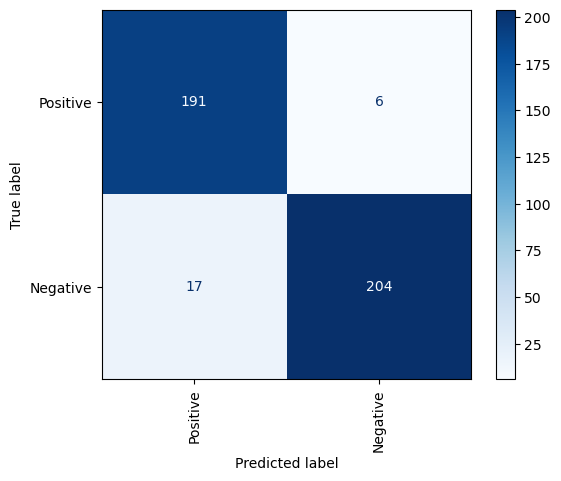

The accuracy of the LogisticRegression model with CountVectorizer is: 0.9450

KNN Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9425837320574163
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       197
           1       0.96      0.93      0.94       221

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418


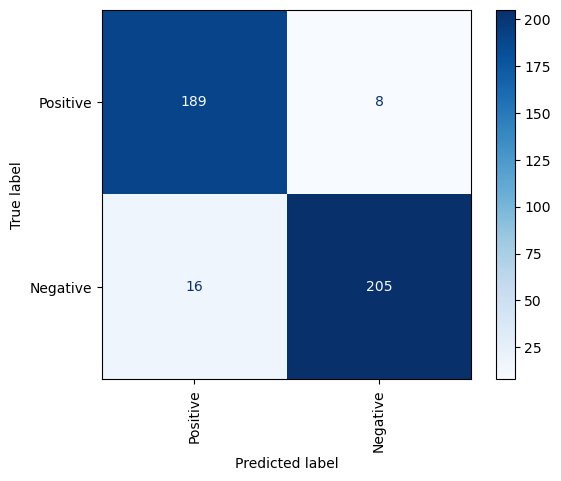

The accuracy of the KNN model with CountVectorizer is: 0.9426

RandomForest Results with CountVectorizer:
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy: 0.9593301435406698
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       197
           1       0.96      0.96      0.96       221

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418


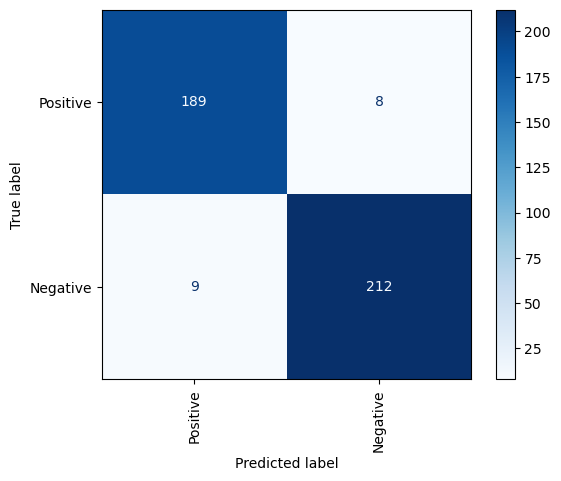

The accuracy of the RandomForest model with CountVectorizer is: 0.9593

XGBoost Results with CountVectorizer:
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9497607655502392
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       197
           1       0.97      0.94      0.95       221

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


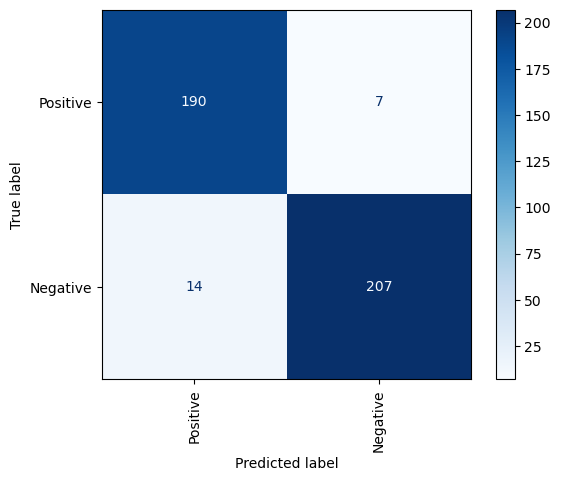

The accuracy of the XGBoost model with CountVectorizer is: 0.9498

SVM Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.97      0.94      0.96       221

    accuracy                           0.95       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.95      0.95       418


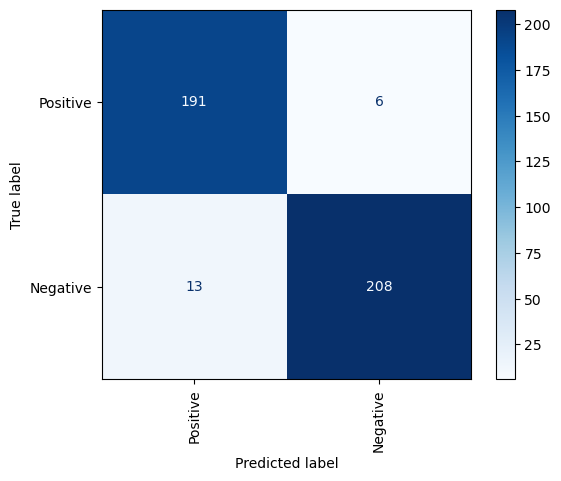

The accuracy of the SVM model with CountVectorizer is: 0.9545

NaiveBayes Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'alpha': 0.1, 'force_alpha': True}
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       197
           1       0.97      0.93      0.95       221

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


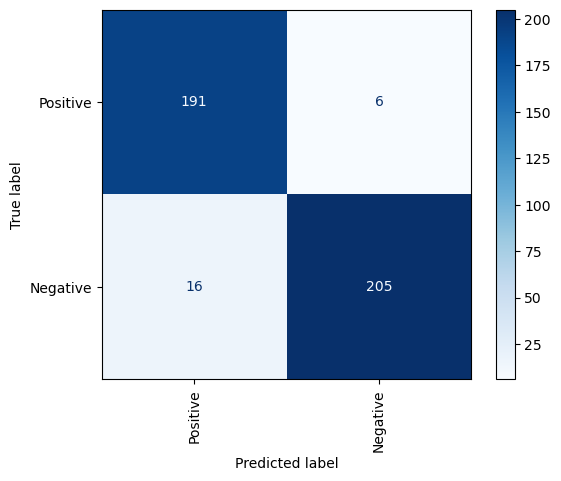

The accuracy of the NaiveBayes model with CountVectorizer is: 0.9474

Using HashingVectorizer

LogisticRegression Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.9497607655502392
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       197
           1       0.96      0.94      0.95       221

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


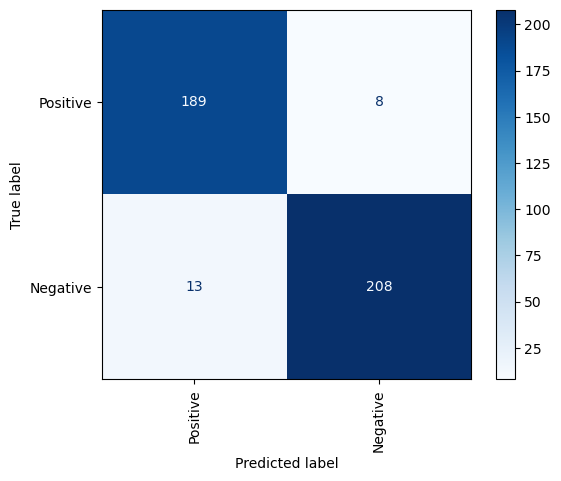

The accuracy of the LogisticRegression model with HashingVectorizer is: 0.9498

KNN Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.9521531100478469
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       197
           1       0.98      0.93      0.95       221

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418


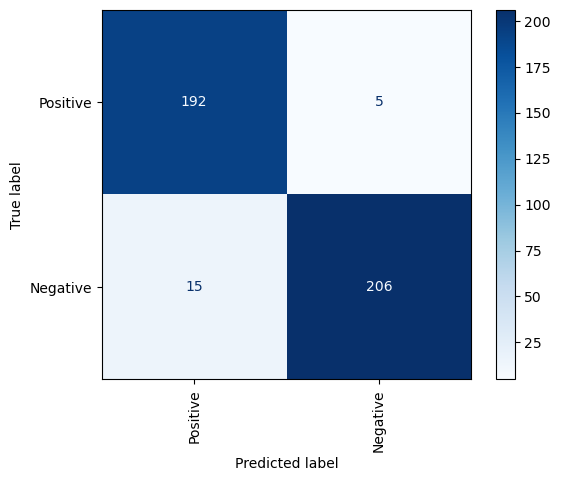

The accuracy of the KNN model with HashingVectorizer is: 0.9522

RandomForest Results with HashingVectorizer:
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       197
           1       0.97      0.98      0.98       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


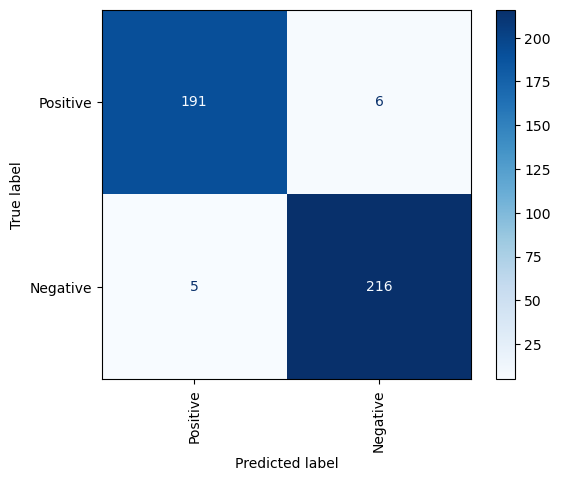

The accuracy of the RandomForest model with HashingVectorizer is: 0.9737

XGBoost Results with HashingVectorizer:
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9712918660287081
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       197
           1       0.98      0.97      0.97       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


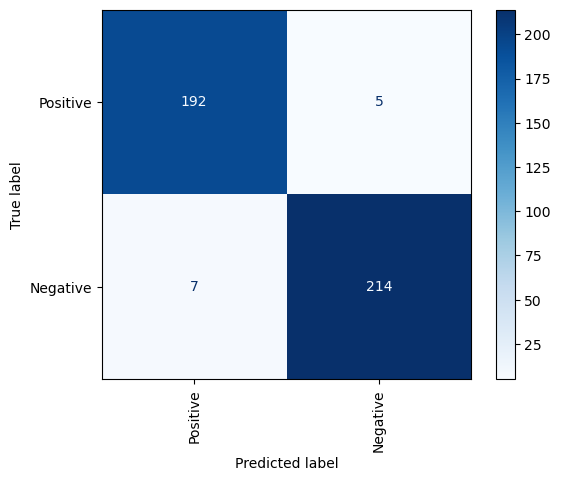

The accuracy of the XGBoost model with HashingVectorizer is: 0.9713

SVM Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       197
           1       0.98      0.97      0.98       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


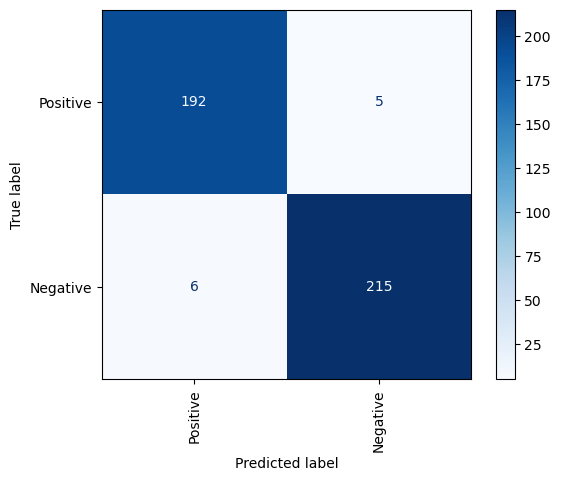

The accuracy of the SVM model with HashingVectorizer is: 0.9737

NaiveBayes Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'alpha': 1, 'force_alpha': True}
Accuracy: 0.8397129186602871
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       197
           1       0.87      0.81      0.84       221

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418


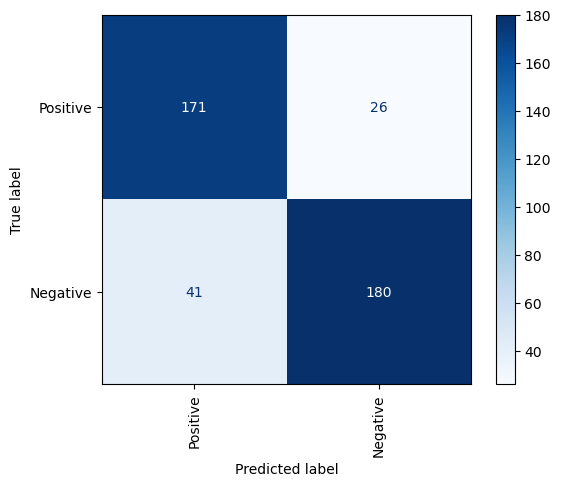

The accuracy of the NaiveBayes model with HashingVectorizer is: 0.8397

Using TfidfVectorizer

LogisticRegression Results with TfidfVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.9712918660287081
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       197
           1       0.98      0.97      0.97       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


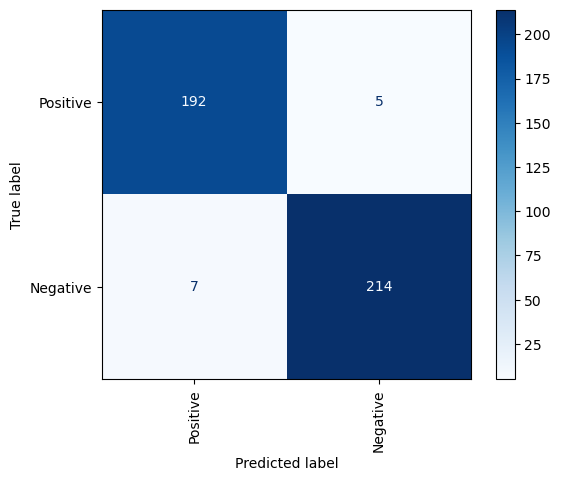

The accuracy of the LogisticRegression model with TfidfVectorizer is: 0.9713

KNN Results with TfidfVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.9234449760765551
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       197
           1       0.92      0.94      0.93       221

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418


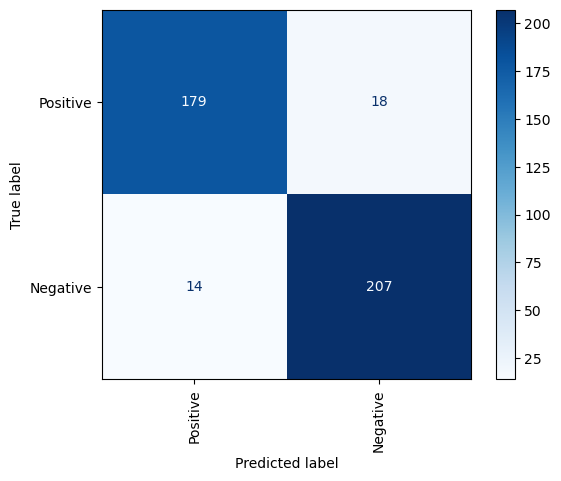

The accuracy of the KNN model with TfidfVectorizer is: 0.9234

RandomForest Results with TfidfVectorizer:
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.9856459330143541
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       197
           1       0.98      1.00      0.99       221

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418


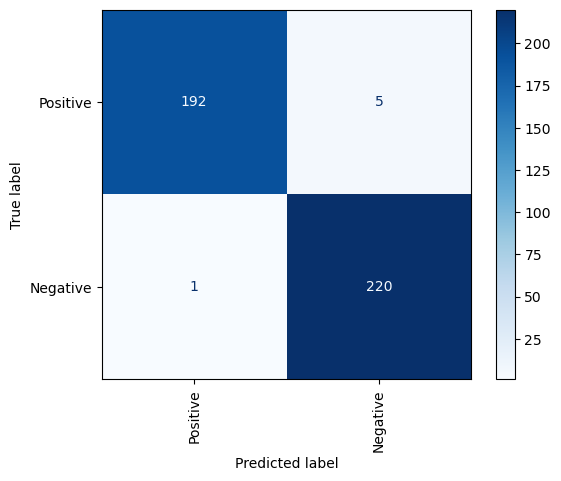

The accuracy of the RandomForest model with TfidfVectorizer is: 0.9856

XGBoost Results with TfidfVectorizer:
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.9880382775119617
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       197
           1       0.98      1.00      0.99       221

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418


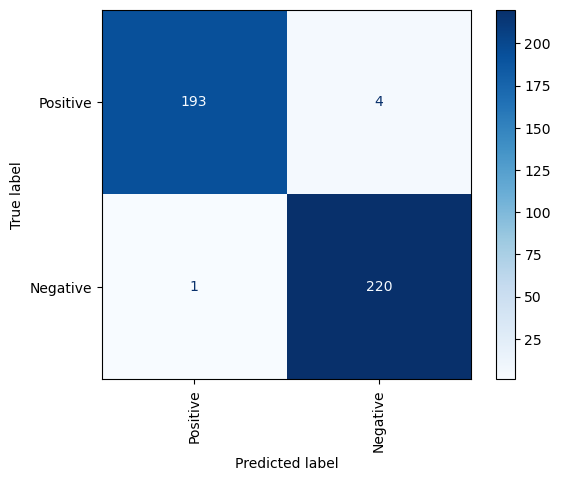

The accuracy of the XGBoost model with TfidfVectorizer is: 0.9880

SVM Results with TfidfVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9712918660287081
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       197
           1       0.97      0.97      0.97       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


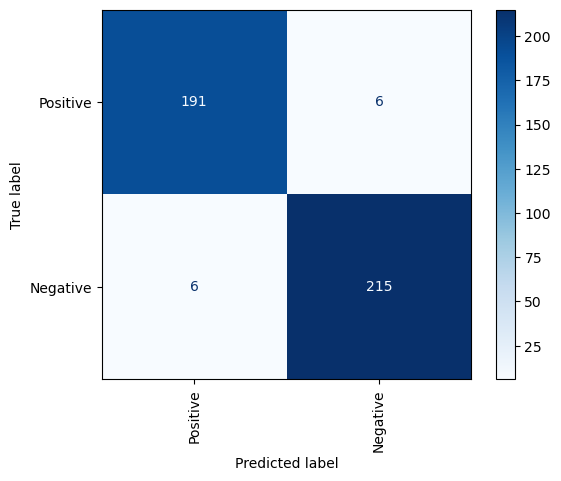

The accuracy of the SVM model with TfidfVectorizer is: 0.9713

NaiveBayes Results with TfidfVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'alpha': 1, 'force_alpha': True}
Accuracy: 0.9688995215311005
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       197
           1       0.99      0.95      0.97       221

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418


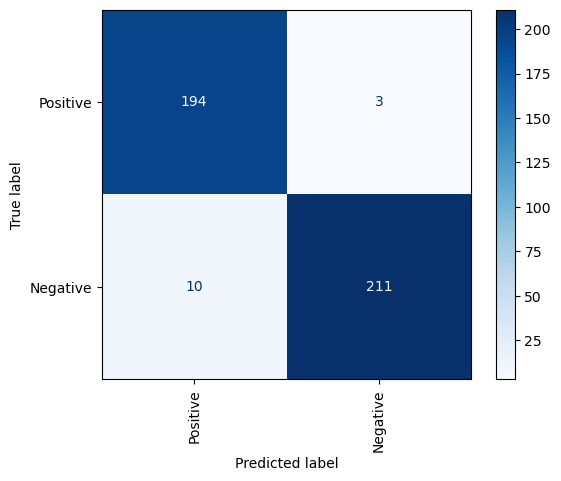

The accuracy of the NaiveBayes model with TfidfVectorizer is: 0.9689


In [47]:
# Importing required libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'
df = pd.read_csv(url)

# Drop duplicates and display class distribution
df = df.drop_duplicates()
print(df.groupby('Sentiment').size())

# Vectorizers setup
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20),
    'HashingVectorizer': HashingVectorizer(ngram_range=(1, 2), n_features=200),
    'TfidfVectorizer': TfidfVectorizer(min_df=20, norm='l2', smooth_idf=True)
}

# Splitting data
X_text = df['Text']
y = df['Sentiment']

# Models and their parameters for GridSearchCV
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'NaiveBayes': (BernoulliNB(), {'alpha': [0.1, 0.5, 1], 'force_alpha': [True, False]})
}

# Function to train and evaluate models
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, cv=3):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Display the confusion matrix
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['Positive', 'Negative'], cmap='Blues', xticks_rotation='vertical')
    plt.show()

    return best_model

# Iterate through each vectorizer
for vec_name, vectorizer in vectorizers.items():
    print(f"\nUsing {vec_name}")
    X = vectorizer.fit_transform(X_text)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Iterate through each model
    for model_name, (model, params) in models.items():
        print(f"\n{model_name} Results with {vec_name}:")
        best_model = train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test, cv=3)
        
        # Calculate and print accuracy
        accuracy = accuracy_score(y_test, best_model.predict(X_test))
        print(f'The accuracy of the {model_name} model with {vec_name} is: {accuracy:.4f}')


In [49]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize an empty list to store results
accuracy_results = []

# Modified train_and_evaluate_model function to store accuracy and best parameters
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, cv=3):
    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and the best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracy and best parameters to the results list
    accuracy_results.append({
        'Model': model.__class__.__name__,
        'Vectorizer': vectorizer.__class__.__name__,
        'Accuracy': accuracy,
        'Best Parameters': best_params
    })
    
    return best_model

# Iterate through each vectorizer
for vec_name, vectorizer in vectorizers.items():
    print(f"\nUsing {vec_name}")
    X = vectorizer.fit_transform(X_text)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Iterate through each model
    for model_name, (model, params) in models.items():
        print(f"\n{model_name} Results with {vec_name}:")
        best_model = train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test, cv=3)

# Create a DataFrame from the accuracy results
accuracy_df = pd.DataFrame(accuracy_results)

# Display the accuracy table
print("\nAccuracy Summary Table:")
print(accuracy_df)



Using CountVectorizer

LogisticRegression Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

KNN Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

RandomForest Results with CountVectorizer:
Fitting 3 folds for each of 9 candidates, totalling 27 fits

XGBoost Results with CountVectorizer:
Fitting 3 folds for each of 8 candidates, totalling 24 fits

SVM Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

NaiveBayes Results with CountVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Using HashingVectorizer

LogisticRegression Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

KNN Results with HashingVectorizer:
Fitting 3 folds for each of 6 candidates, totalling 18 fits

RandomForest Results with HashingVectorizer:
Fitting 3 folds for each of 9 candidates, totalling 27 fits

XGBoost Results with HashingVec